In [2]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

In [3]:
class SierpinskiTriangle():
    def __init__(self, n):
        self.n = n
        self.dic = {0:' ', 1:'^'}
        
        self.state = np.zeros(n)
        self.state[n//2 - 1] = 1
        
        # could make a sparse matrix to be more efficient
        self.G = np.zeros((n, n))
        self.G[range(1,n), range(n-1)] = 1
        self.G[range(n-1), range(1,n)] = -1
        
    def __repr__(self):
        return ''.join([self.dic[s] for s in self.state])
    
    def step(self):
        self.state = np.abs(np.dot(self.G, self.state))
        
    def show(self):
        plt.imshow(self.G, interpolation='nearest', cmap='gray')

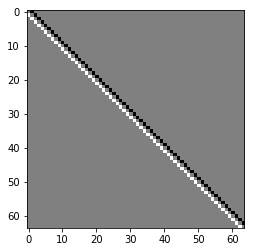

In [4]:
st = SierpinskiTriangle(64)
st.show()
# the transition graph

In [5]:
for i in range(32):
    print(st)
    st.step()

                               ^                                
                              ^ ^                               
                             ^   ^                              
                            ^ ^ ^ ^                             
                           ^       ^                            
                          ^ ^     ^ ^                           
                         ^   ^   ^   ^                          
                        ^ ^ ^ ^ ^ ^ ^ ^                         
                       ^               ^                        
                      ^ ^             ^ ^                       
                     ^   ^           ^   ^                      
                    ^ ^ ^ ^         ^ ^ ^ ^                     
                   ^       ^       ^       ^                    
                  ^ ^     ^ ^     ^ ^     ^ ^                   
                 ^   ^   ^   ^   ^   ^   ^   ^                  
                ^ ^ ^ ^ ^

In [6]:

# an equilateral triangle
verts = np.array([
    [0, 0],
    [1, 0],
    [0.5, np.sqrt(1-0.5**2)],
]).T

In [7]:
def choose_vertex():
    idx = np.random.choice([0,1,2])
    return verts[:, idx]

def combine_verts(a, b):
    return (a + b)/2

In [8]:
pts = [choose_vertex() for _ in range(100000)]  
# does matter what seq we sample!?
pts = np.vstack(itertools.accumulate(pts, combine_verts))

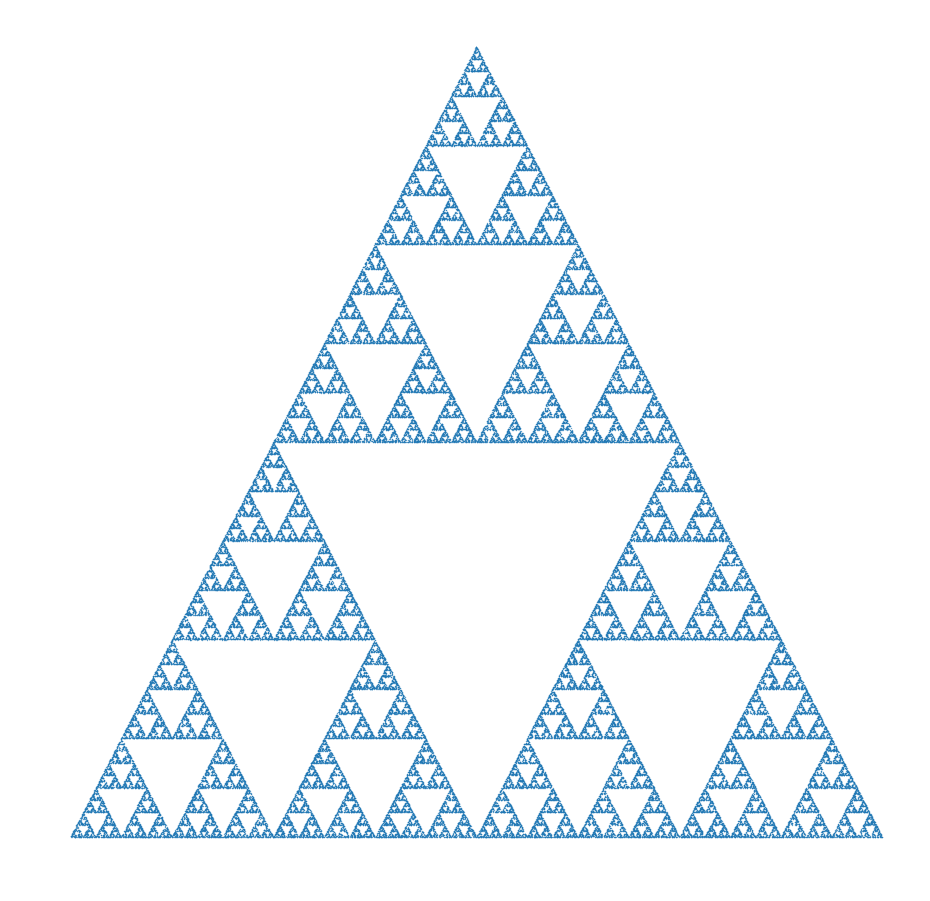

In [9]:
plt.figure(figsize=(16, 16))
plt.scatter(pts[:,0], pts[:,1], s=0.1)
_ = plt.axis('off')